<h1>Tarea semanal 6</h1>

<h3> Consignas </h3>

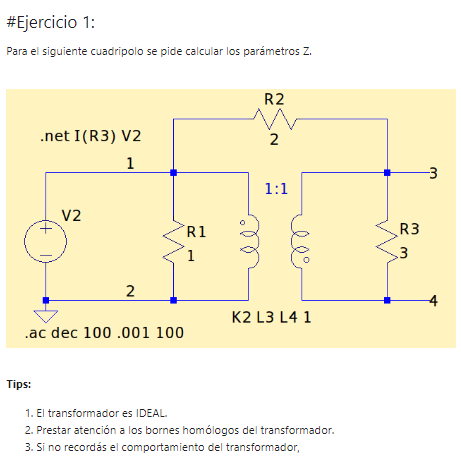

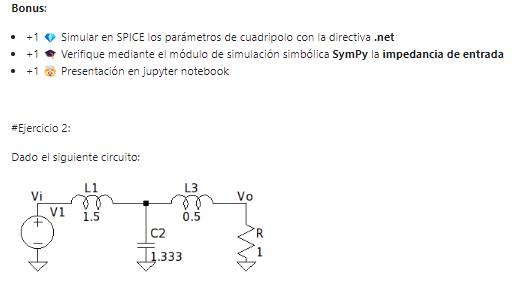

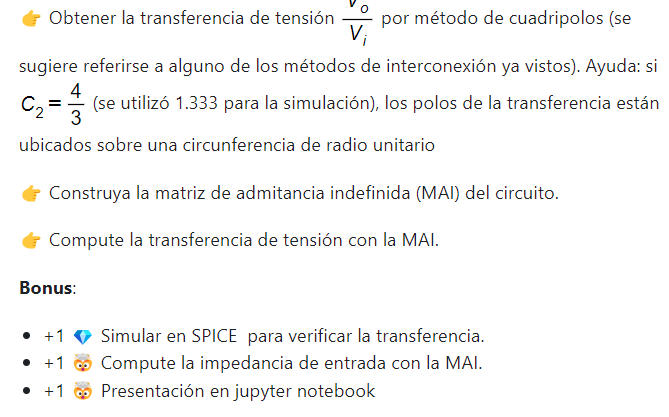

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


<h1>Simulaciones LTspice</h1>


<h3>Ejercicio 1</h3>

Modelo Transformador

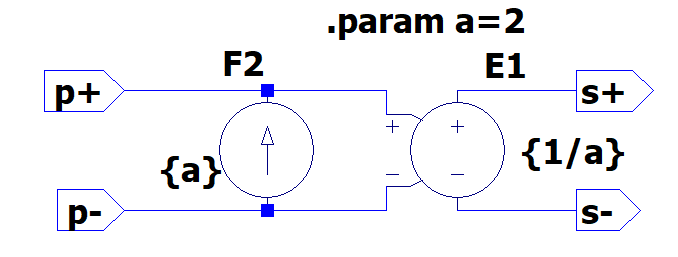

Cicuito simulado

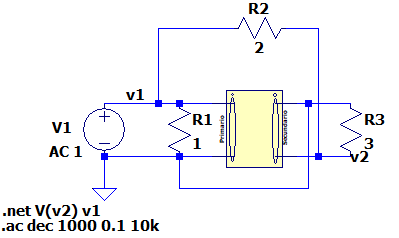

Resultado de la simulacion

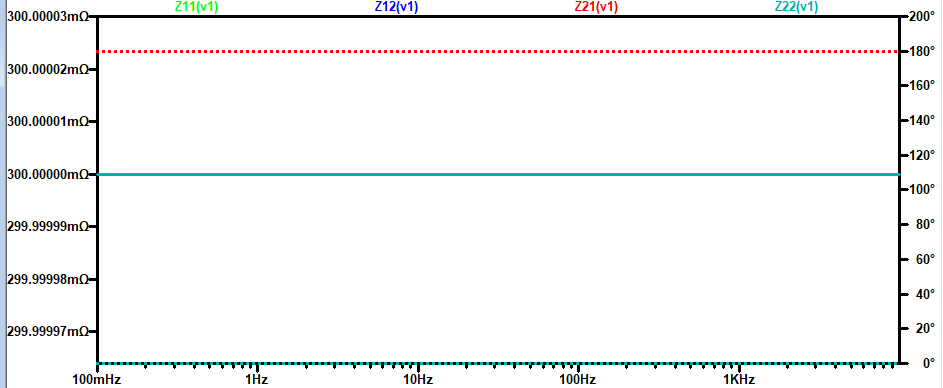

Como se puede observar, los resultados coinciden con los calculados. Cabe destacar que si bien pareciera que todos los parametros tienen el mismo signo, debemos notar que tienen distintas fases siendo Z12 y Z21, 180° defasadas respecto de Z11 y Z22

Como observacion podemos ver la simulacion de los parametros Y:

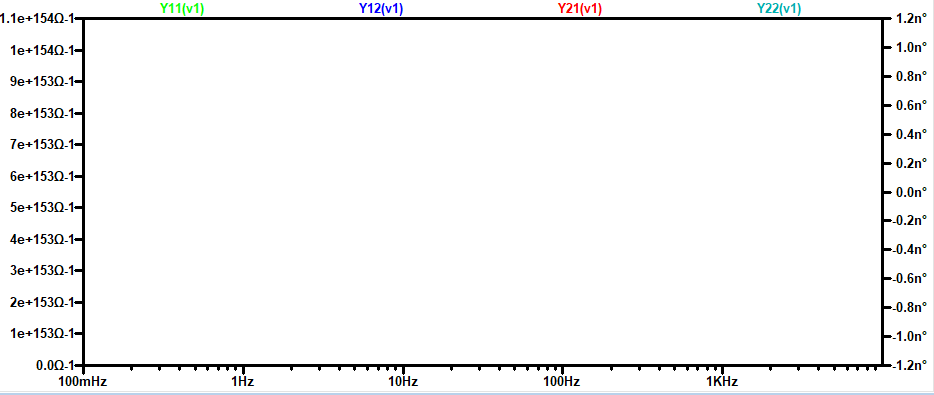

En donde como era de esperarse no se encuentran definidos por lo que el simulador no los grafica.

<h3>Ejercicio 2</h3>

El circuito simulado es el siguiente:

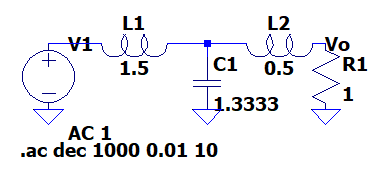

Al simular el circuito se obtuvo el siguiente grafico

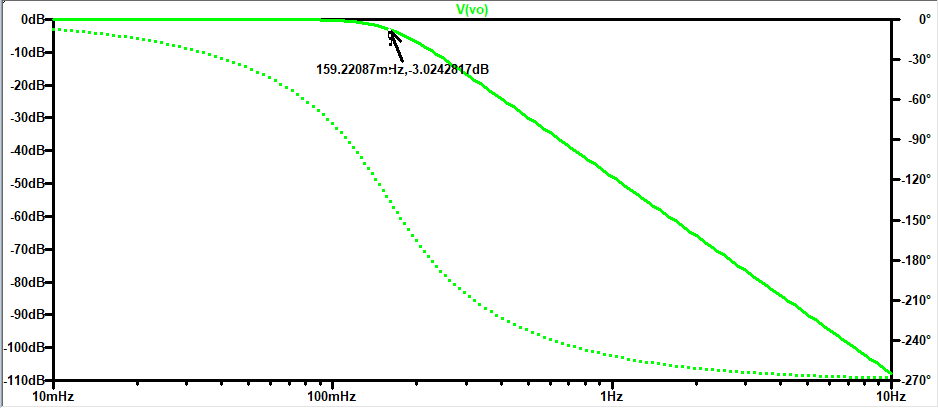

<h1>Simulaciones Python</h1>

<h3>Ejercicio 2</h3>

In [1]:
import sympy as sp

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex


YL1, YL2, YL3, YC2= sp.symbols('YL1 YL2 YL3 YC2', complex=True)
G = sp.symbols('G', real=True, positive=True)


# Armo la MAI

#               Nodos: 0         1            2         3
Ymai = sp.Matrix([
                    [ YL1,      -YL1,          0,       0      ],
                    [ -YL1,  YL1+YL3+YC2,    -YL3,    -YC2     ],
                    [   0,       -YL3,       YL3+G,    -G      ],
                    [   0,       -YC2,        -G,      YC2 + G ]
                 ])



# Calculo la Z en el puerto de entrada a partir de la MAI
print("Impedancia de entrada:")
Zmai = calc_MAI_impedance_ij(Ymai, 3, 0, verbose=True)

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 2, 3, 3, 0, verbose=True)

Impedancia de entrada:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

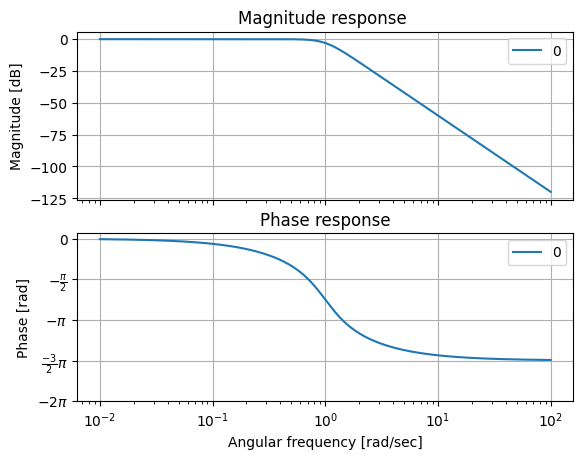

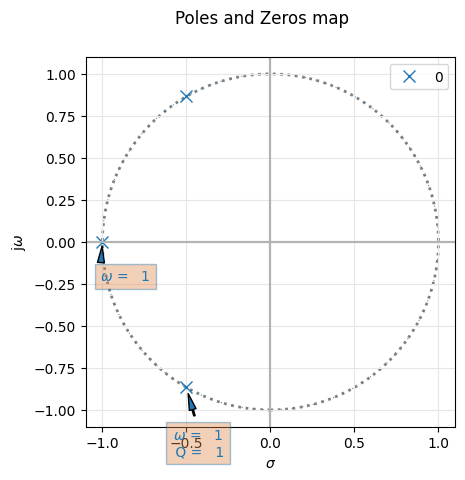

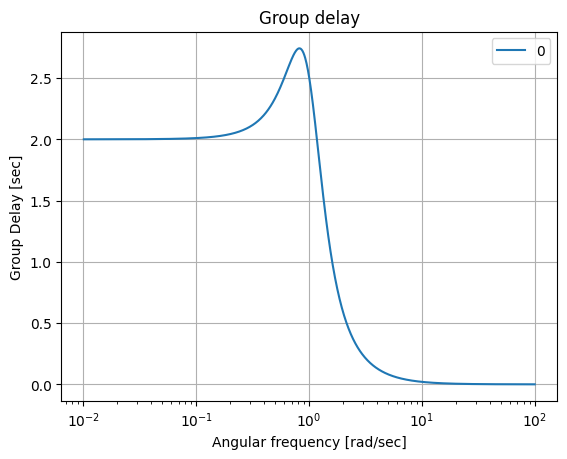

In [4]:
from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import analyze_sys

# componentes

l1= 1.5
l3= 0.5
c2= 1.3333
r= 1

## Transferencia 

tf_den = [r/(l1*l3*c2)]
tf_num =  [1,r/l3,(l1+l3)/(l1*l3*c2),r/(l1*l3*c2)]

tf_completa = TransferFunction(tf_den, tf_num)

## Simulacion Normalizada

analyze_sys( tf_completa )

<h1>Conclusiones</h1>

En cuanto al primer ejercicio se destaca el uso y manejo de cuadripolos, y como mediante equivalencias y transformaciones de parametros se pueden resolver circuitos poco comunes como en este caso.
La simulacion de LTspice permitio contrastar los resultados obtenidos y se adquirio una nueva herramienta como es la simulacion de parametros de cuadripolos que hasta ahora desconocia.
Al realizar la resolucion, en un comienzo se planteo mediante dos cuadripolos (siendo uno el transformador y otro una red Pi), y se llego a la conclusion de que no era viable realizar por este camino ya que no se encontraba definida la matriz "Y" del transofrmador. Es por ello que se utilizo el metodo visto en donde se transformo directamente a la matriz Z mediante una agrupacion en cascada con parametros T y luego obteniendo un circuito equivalente ya visto en clase.

Como conclusiones para el segundo ejercicio, se pudo observar la gran utilidad de la MAI y como en forma tan directa se puede obtener mucha informacion del circuito. Clarmanete se demuestra que es un metodo numerico computacional y no una herramienta pensada para realizar en lapiz y papel.
Los resultados obtenidos por cuadripolos y por MAI coinciden aunque quedaria pendiente poder transformar el resultado de la MAI en forma automatica a una transferencia en el formato que estamos acostumbrados (ya que la transferencia obtenida esta en funcion de admitancias).


